In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split 
pd.options.display.max_columns = 100
%matplotlib inline
from sklearn.metrics import mean_absolute_error

In [116]:
data = pd.read_csv('./P_F_DS/data_v1-12.csv')

#градиентный спуск

In [117]:
X = data['x']

In [118]:
y = data['y']

In [119]:
tets = [1, 0.5, 0.1]

In [120]:
count_ = y.count()

In [121]:
def mse_(tets):
    for t in range(len(tets)):
        plt.scatter (X,y)
        W1 = np.sum((y-t*X)**2) / (count_)
        plt.scatter(X, y)
        plt.plot(X, X*W1, marker='o', linestyle='dashed',   linewidth=2, markersize=1)


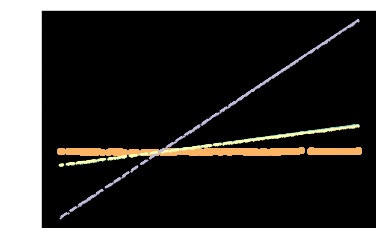

In [122]:
mse_(tets)

Построить графики зависимости выхода модели от x, наложенные на диаграмму рассеяния, при  = 0.5 для случаев: а) слишком простой модели; б) переобучения; в) хорошей обобщающей способности.

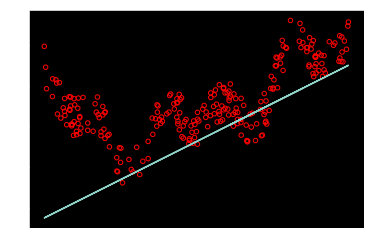

In [123]:
plt.scatter(X, y, s=20, facecolors='none', edgecolors='r')
plt.plot (X, X*0.5)

In [124]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
X_train1, X_test1, y_train1, y_test1 = train_test_split (X, y, test_size=0.01, random_state=15)


In [125]:
X_train1 = X_train1.values.reshape(-1,1)
y_train1 = y_train1.values.reshape(-1,1)
lr.fit(X_train1, y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [126]:
X_test1 = X_test1.values.reshape(-1, 1)

In [127]:
y_pred1 = lr.predict(X_test1)

In [128]:
mse1=mseib(y_test1, y_pred1)
mse1

0.16267770544893792

In [129]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,y, test_size=0.1, random_state=15)
X_train2 = X_train2.values.reshape(-1,1)
y_train2 = y_train2.values.reshape(-1,1)
lr.fit(X_train2, y_train2)
X_test2 = X_test2.values.reshape(-1, 1)
y_pred2 = lr.predict(X_test2)
mse2=mseib(y_test2, y_pred2)
mse2


1.1176411879542838

In [130]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X,y, test_size=1, random_state=15)
X_train3 = X_train3.values.reshape(-1,1)
y_train3 = y_train3.values.reshape(-1,1)
lr.fit(X_train3, y_train3)
X_test3 = X_test3.values.reshape(-1, 1)
y_pred3 = lr.predict(X_test3)
mse3=mseib(y_test3, y_pred3)
mse3

0.1564125382603269

In [131]:
from sklearn.metrics import mean_squared_error
mseib=mean_squared_error

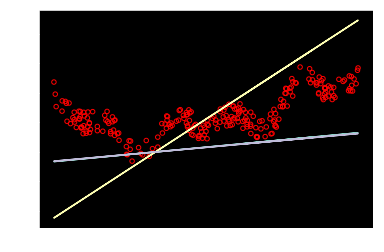

In [132]:
mse1=mseib(y_test1, y_pred1)
mse2=mseib(y_test2, y_pred2)
mse3=mseib(y_test3, y_pred3)
plt.scatter(X, y, s=20, facecolors='none', edgecolors='r')
plt.plot (X, X*mse1)
plt.plot (X, X*mse2)
plt.plot (X, X*mse3)